In [6]:
from IPython.core.display import HTML
css = open('notebook_css/style-table.css').read() + open('notebook_css/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

Author: @imflash217 [September/08/2021]

# DATASET & DATALOADERS

## Loading a Dataset

In [3]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [5]:
train_dataset = datasets.FashionMNIST(root="data",
                                      train=True,
                                      download=True,
                                      transform=ToTensor(),)

test_dataset = datasets.FashionMNIST(root="data",
                                     train=False,
                                     download=True,
                                     transform=ToTensor(),)

In [8]:
len(train_dataset), len(test_dataset)

(60000, 10000)

## Iterating & Visualizing the dataset

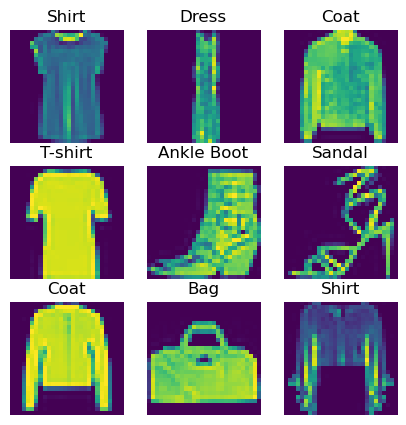

In [16]:
labels_map = {
    0: "T-shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

fig = plt.figure(figsize=(5,5))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(low=0, high=len(train_dataset), size=(1,)).item()
    img_, label_ = train_dataset[sample_idx]
    fig.add_subplot(rows, cols, i)
    plt.title(labels_map[label_])
    plt.axis("off")
    plt.imshow(img_.squeeze())
plt.show()


## Creating a custom Dataset for your files

A custom Dataset class must implement three methods **`__init__()`, `__len__()`, `__getitem__()`** 

In [19]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, 
                 annotations_file, 
                 img_dir, 
                 transform=None,
                 target_transform=None
                ):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.img_labels)
        
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        
        return (image, label)
    

## Preparing your data for training with Dataloaders

In [21]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_dataset,
                              batch_size=64, 
                              shuffle=True,
                             )

test_dataloader = DataLoader(dataset=test_dataset, 
                             batch_size=64, 
                             shuffle=True,
                            )

## Iterate through the DataLoader

Features batch shape = torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


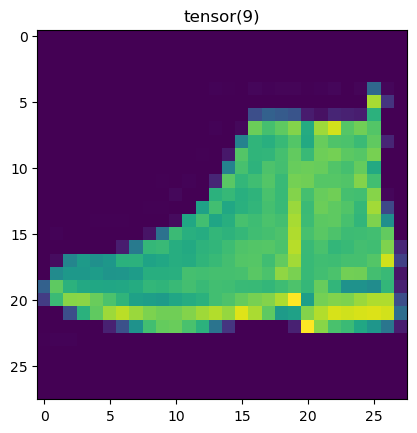

In [47]:
## Display image and labels

train_features, train_labels = next(iter(train_dataloader))
print(f"Features batch shape = {train_features.shape}")
print(f"Labels batch shape: {train_labels.shape}")

img = train_features[0, ...].squeeze()
label = train_labels[0, ...].squeeze()
plt.imshow(img)
plt.title(label)
plt.show()